# Elements of convex analysis


The purpose of this notebook is to implement Gradient Descent.
The notebook will use helper functions to draw functions (in [ex4_helpers.py](ex4_helpers.py) file, but there is no need to look at it).

This exercise requires **numpy**, **matplotlib**, **seaborn** and **autograd** libraries (unless you want to implement gradient yourself).


In [1]:
# a line making the graphs show up in the notebook
# you can safely ignore it (but run it!).
%matplotlib inline

# Some important imports (for drawing):
from ex4_helpers import plot_steps_1d, plot_steps_2d

import numpy as np
from autograd import grad
import autograd.numpy as anp


## Sample random walk for presentation


In [2]:
# takes initial point and function (ignores function) and takes 10 random steps
# it works regardless of dimensionality
def random_walk(f, x0, steps=10):
    x = np.array(x0)
    points = [x]
    for _ in range(steps):
        x = x + (np.random.random(np.shape(x)) - 0.5) * 2
        points.append(x)
    return points

## How to plot 1d

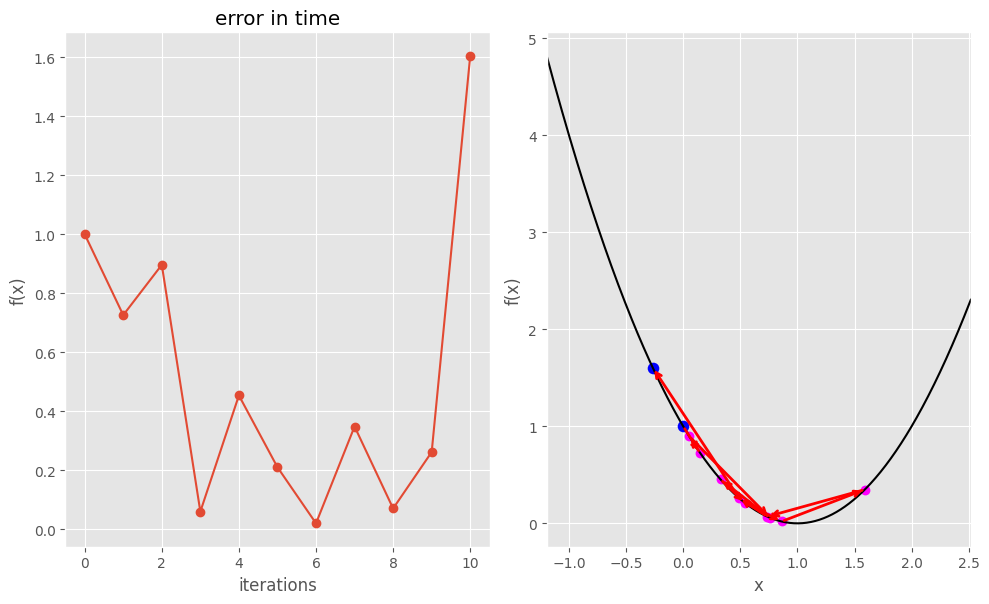

In [3]:
f = lambda x:(x-1)**2
x0 = 0.0
points = random_walk(f, x0)
plot_steps_1d(f, points)

## How to plot 2d

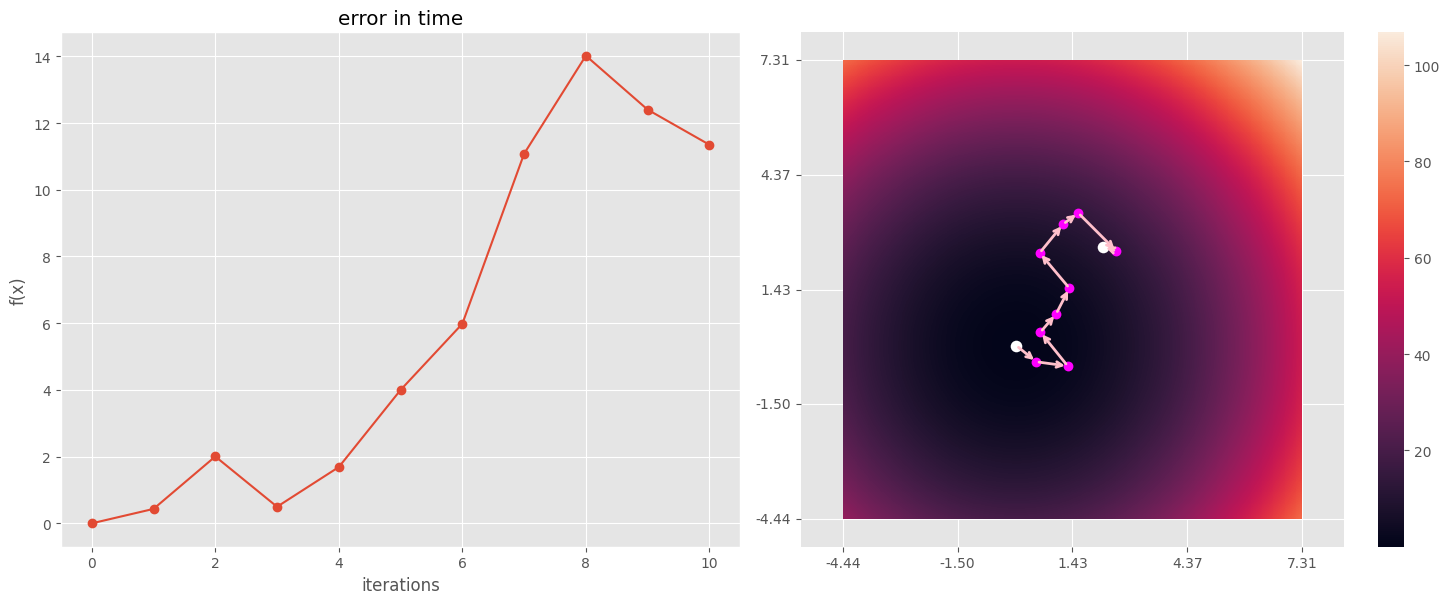

In [4]:
f = lambda x:x@x
x0 = np.zeros(2)
points = random_walk(f, x0)
plot_steps_2d(f, points)

## Your gradient descent implementation:



In [5]:
def gd(f, x0, learning_rate=0.1, steps=10):
    x = np.array(x0)
    points = [x]
    for _ in range(steps):
        x = x - learning_rate * grad(f)(x)
        points.append(x)
    return points


# Test sample functions in 1d:

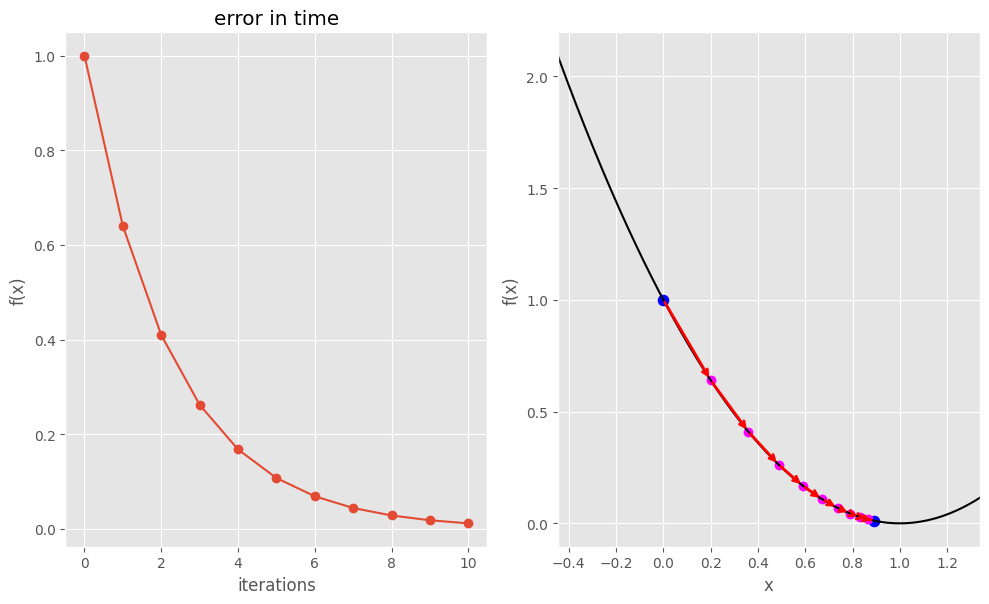

In [9]:
f = lambda x:(x-1)**2
# f = lambda x:-(x-1)**2
# f = lambda x: x
# f = lambda x: (x-1) ** 2 + 4 * (0.5 * anp.sin((x-1) * 10)) ** 2

x0 =0.0
points = gd(f, x0, learning_rate=0.1)
plot_steps_1d(f, points)


# Check if 2d functions work as well


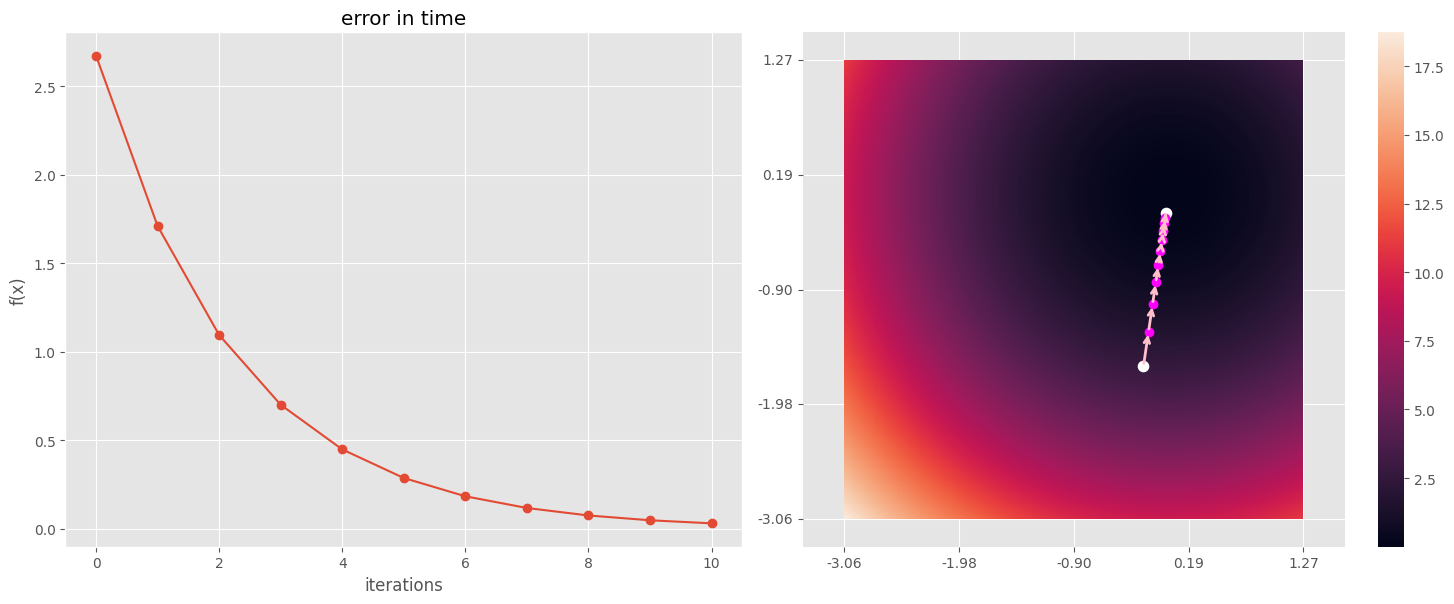

In [10]:
f = lambda x: x@x
# f = lambda x: -x@x
# f = lambda x: np.array([1,2])*x@x
# f = lambda x: np.array([1,5])*x@x

x0 = np.random.random(2)*6 - 3
points = gd(f, x0, learning_rate=0.1)
plot_steps_2d(f, points)

# Cauchy method (very cathy name! :D)
Implement Cauchy method for 2d and compare it to gd? Why is it pointless to implement 1d version?

Implementation hint: you may reuse 1d optimization method implementations to find best eta in each step.

In [15]:
def cauchy(f, x0, steps=10):
    x = np.array(x0)
    points = [x]
    for _ in range(steps):
        eta = 0.01
        steepest_descent = -grad(f)(x)
        for _ in range(1000):
            x_new = x + eta * steepest_descent
            if f(x_new) < f(x):
                x = x_new
            eta += 0.01
        points.append(x)
    return points

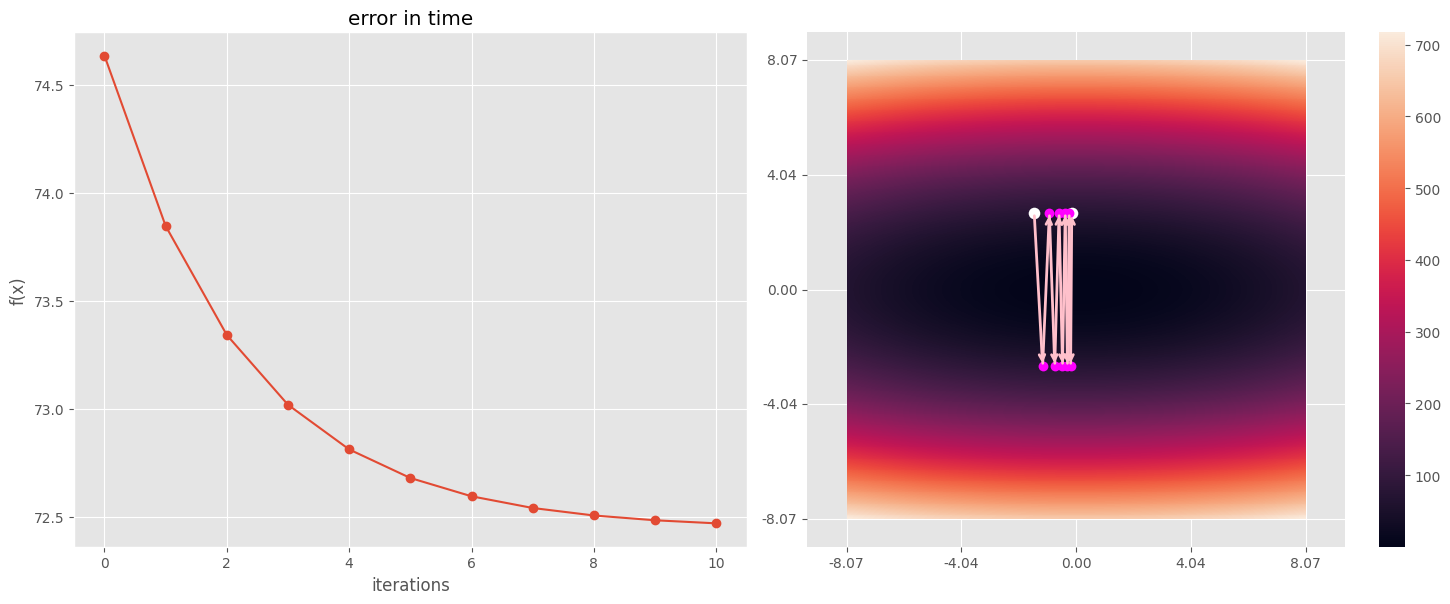

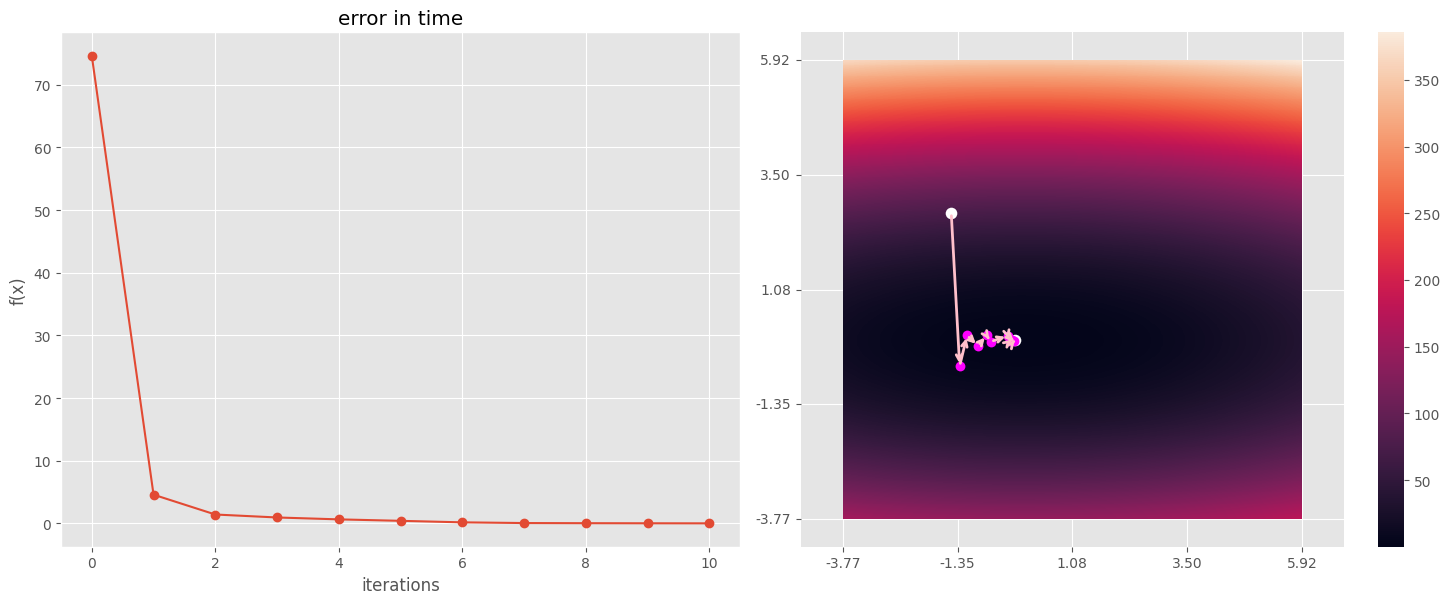

In [19]:
f = lambda x: x@x
f = lambda x: -x@x
f = lambda x: np.array([1,2])*x@x
f = lambda x: np.array([1,10])*x@x

x0 = np.random.random(2)*6 - 3
gd_points = gd(f, x0, learning_rate=0.1)
cauchy_points = cauchy(f,x0)
plot_steps_2d(f, gd_points)
plot_steps_2d(f, cauchy_points)
